In [1]:
import pandas as pd
import numpy as np
#import h2o
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [77]:
%load_ext autoreload
%autoreload 2

In [6]:
data_2019 = pd.read_csv("agents2019.csv")

In [2]:
pd.set_option("display.max_columns", 200)

In [8]:
data_2019.head(5)

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
0,0,0,0,0.0,0,0.000000,0,2.895541e+06,6.245860e+06,9.050955e+06,1.889724e+09,1.803724e+09,2.145239e+09,1.928685e+09,1.880842e+09,2.440078e+09,3.583766e+09,3.683359e+09,3.475461e+09,5.159380e+09,5.897326e+09,6.077448e+09,6.294000e+08,6.294000e+08,6.294000e+08,2.673020e+09,2.971017e+09,2.289274e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.498777e+08,2.589732e+08,2.712210e+08,0.000000e+00,0.000000e+00,3.923917e+08,4.080056e+09,4.452922e+09,5.476906e+09,4.165168e+09,4.548178e+09,5.957031e+09,2.667698e+10,4.162693e+10,3.703952e+10,2.156814e+10,3.335443e+10,3.438313e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.280355e+09,6.200120e+09,8.716191e+08
1,1,1,0,0.0,0,0.000000,0,0.000000e+00,3.885350e+04,3.439490e+04,1.448108e+08,1.487153e+08,1.526427e+08,1.456783e+08,1.497987e+08,1.538924e+08,5.584777e+07,4.678217e+07,1.563478e+08,1.489153e+08,1.898987e+08,2.914637e+08,1.345860e+06,1.345860e+06,1.345860e+06,2.726650e+08,2.774083e+08,3.106586e+08,0.000000e+00,0.000000e+00,0.000000e+00,3.108280e+06,4.528025e+06,5.033758e+06,9.745223e+06,4.760637e+07,6.349873e+07,9.075159e+06,1.015478e+07,6.616497e+07,1.882038e+07,5.776115e+07,1.296637e+08,2.554898e+08,2.573669e+08,5.434306e+08,2.056815e+08,2.055325e+08,4.169796e+08,1.212357e+07,6.944586e+06,4.480064e+07,1.630064e+07,1.109172e+07,5.135732e+07
2,2,2,7,5.5,1,132825.299363,2,2.468153e+06,1.288025e+07,8.694904e+06,9.698064e+08,9.444166e+08,9.287389e+08,9.732745e+08,1.036412e+09,1.018682e+09,2.814675e+08,2.321070e+08,2.280497e+08,1.286917e+09,1.489083e+09,1.590217e+09,1.964459e+07,1.964459e+07,1.964459e+07,2.110425e+09,2.339440e+09,2.378698e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.339809e+07,1.183121e+07,2.843949e+06,0.000000e+00,0.000000e+00,0.000000e+00,8.246879e+07,8.857197e+07,1.237713e+08,1.363688e+08,1.742242e+08,2.273567e+08,2.786577e+09,2.699397e+09,2.592420e+09,2.038076e+09,2.178598e+09,2.316724e+09,5.026662e+08,3.644229e+08,8.552994e+07,4.148586e+08,1.611318e+08,-9.298981e+07
3,3,3,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.0

In [58]:
data_2019.columns

Index(['Unnamed: 0', 'Наименование ДП', 'Макс. ПДЗ за 2019 год, дней',
       'Сред. ПДЗ за 2019 год, дней',
       'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
       'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
       'Кол-во раз ПДЗ за 2019 год, шт.', '2016, Нематериальные активы, RUB',
       '2017, Нематериальные активы, RUB', '2018, Нематериальные активы, RUB',
       ...
       'Краткосрочные обязательства ,отношение за 1 год(а)',
       'Краткосрочные обязательства ,отношение за 2 год(а)',
       'Выручка ,отношение за 1 год(а)', 'Выручка ,отношение за 2 год(а)',
       'Себестоимость продаж ,отношение за 1 год(а)',
       'Себестоимость продаж ,отношение за 2 год(а)',
       'Прибыль (убыток) до налогообложения  ,отношение за 1 год(а)',
       'Прибыль (убыток) до налогообложения  ,отношение за 2 год(а)',
       'Прибыль (убыток) от продажи ,отношение за 1 год(а)',
       'Прибыль (убыток) от продажи ,отношение за 2 год(а)'],
      dtype='object', length=119)

In [10]:
data_2020 = pd.read_csv("agents2020.csv")

In [11]:
data_2020.head()

,Наименование ДП,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,Факт. 10,Факт. 11,Факт. 12,Факт. 13,Факт. 14,Факт. 15,Факт. 16,Факт. 17,Факт. 18,Факт. 19,Факт. 20,Факт. 21,Факт. 22,Факт. 23,Факт. 24,Факт. 25,Факт. 26,Факт. 27,Факт. 28,Факт. 29,Факт. 30,Факт. 31,Факт. 32,Факт. 33,Факт. 34,Факт. 35,Факт. 36,Факт. 37,Факт. 38,Факт. 39,Факт. 40,Факт. 41,Факт. 42,Факт. 43,Факт. 44,Факт. 45,Факт. 46,Факт. 47,Факт. 48,Факт. 49,Факт. 50,Факт. 51,Факт. 52,Факт. 53,Факт. 54,Факт. 55,Факт. 56,Факт. 57,Факт. 58,Факт. 59,Факт. 60,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
0,0,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,10,Х,Х,Х,Х,Н/Д,Х,Х,Х,Х,Х,Х,10.0,10,6.400000,4,2.229696e+06,5,2.895541e+06,6.245860e+06,9.050955e+06,9.885987e+06,1.889724e+09,1.803724e+09,2.145239e+09,3.606103e+09,1.928685e+09,1.880842e+09,2.440078e+09,3.737611e+09,3.583766e+09,3.683359e+09,3.475461e+09,3.692142e+09,5.159380e+09,5.897326e+09,6.077448e+09,4.981792e+09,6.294000e+08,6.294000e+08,6.294000e+08,6.294000e+08,2.673020e+09,2.971017e+09,2.289274e+09,4.865035e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.498777e+08,2.589732e+08,2.712210e+08,2.764834e+08,0.000000e+00,0.000000e+00,3.923917e+08,0.000000e+00,4.080056e+09,4.452922e+09,5.476906e+09,3.478978e+09,4.165168e+09,4.548178e+09,5.957031e+09,3.577885e+09,2.667698e+10,4.162693e+10,3.703952e+10,3.234755e+10,2.156814e+10,3.335443e+10,3.438313e+10,2.673481e+10,3.1

In [12]:
data_2020.describe()

,Наименование ДП,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
count,531.000000,525.000000,531.000000,531.000000,531.000000,5.310000e+02,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02
mean,265.000000,30.400000,26.924670,10.263054,9.167608,6.155193e+06,22.875706,2.581892e+07,3.600098e+07,4.672202e+07,5.877360e+07,5.294546e+09,6.206710e+09,7.080918e+09,7.726455e+09,7.688534e+09,8.117876e+09,9.897002e+09,1.066235e+10,1.552848e+09,1.858950e+09,2.148777e+09,2.535494e+09,4.084852e+09,4.373678e+09,5.009868e+09,6.290578e+09,1.226609e+09,1.250896e+09,1.284200e+09,1.404963e+09,4.385617e+09,4.603614e+09,5.497492e+09,6.630589e+09,3.748335e+09,3.935466e+09,4.797155e+09,4.627470e+09,4.911662e+09

In [13]:
data_2021 = pd.read_csv("agents2021.csv")

In [14]:
data_2021.head()

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб.",Статус,"2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2020, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2020, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2020, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2020, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2020, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2020, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2020, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB",Факт. 20,Факт. 21,Факт.32,Факт.31,Факт.23,Факт 24,Факт 27,Факт 33,Факт 28,Факт 29,Факт 30,Факт 40,Факт 41,Факт 42,Факт 46,Факт 48,Факт 49,Факт 50,Факт 51,Факт 54,Факт 55,Факт 56,Факт 57,Факт 58,Факт 59,Факт 60,Факт 37,Факт 39,Факт 1,Факт 2,Факт 3,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
0,0,0,0,0.0,0,0.000000,0,10,6.400000,4,2.229696e+06,5,3.715287e+06,3.715287e+06,Действующая,2.895541e+06,6.245860e+06,9.050955e+06,9.885987e+06,2.332484e+06,1.889724e+09,1.803724e+09,2.145239e+09,3.606103e+09

In [15]:
data_2021.describe()

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2020, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2020, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2020, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2020, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2020, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2020, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2020, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB",Факт. 20,Факт. 21,Факт.32,Факт.31,Факт.23,Факт 24,Факт 27,Факт 33,Факт 28,Факт 29,Факт 30,Факт 40,Факт 41,Факт 42,Факт 46,Факт 48,Факт 49,Факт 50,Факт 51,Факт 54,Факт 55,Факт 56,Факт 57,Факт 58,Факт 59,Факт 60,Факт 37,Факт 39,Факт 1,Факт 2,Факт 3,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
count,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000

In [16]:
data_2021["Наименование ДП"].nunique()

325

In [18]:
data_2019.shape, data_2020.shape, data_2021.shape

((531, 55), (531, 131), (325, 136))

In [19]:
data_2020.columns

Index(['Наименование ДП', 'Факт. 1', 'Факт. 2', 'Факт. 3', 'Факт. 4',
       'Факт. 5', 'Факт. 6', 'Факт. 7', 'Факт. 8', 'Факт. 9',
       ...
       '2018, Себестоимость продаж, RUB', '2019, Себестоимость продаж, RUB',
       '2016, Прибыль (убыток) до налогообложения , RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2016, Прибыль (убыток) от продажи, RUB',
       '2017, Прибыль (убыток) от продажи, RUB',
       '2018, Прибыль (убыток) от продажи, RUB',
       '2019, Прибыль (убыток) от продажи, RUB'],
      dtype='object', length=131)

In [20]:
data_2019.columns

Index(['Unnamed: 0', 'Наименование ДП', 'Макс. ПДЗ за 2019 год, дней',
       'Сред. ПДЗ за 2019 год, дней',
       'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
       'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
       'Кол-во раз ПДЗ за 2019 год, шт.', '2016, Нематериальные активы, RUB',
       '2017, Нематериальные активы, RUB', '2018, Нематериальные активы, RUB',
       '2016, Основные средства , RUB', '2017, Основные средства , RUB',
       '2018, Основные средства , RUB', '2016, Внеоборотные активы, RUB',
       '2017, Внеоборотные активы, RUB', '2018, Внеоборотные активы, RUB',
       '2016, Дебиторская задолженность, RUB',
       '2017, Дебиторская задолженность, RUB',
       '2018, Дебиторская задолженность, RUB', '2016, Оборотные активы, RUB',
       '2017, Оборотные активы, RUB', '2018, Оборотные активы, RUB',
       '2016, Уставный капитал , RUB', '2017, Уставный капитал , RUB',
       '2018, Уставный капитал , RUB', '2016, Капитал и резервы, RUB',
       '2

In [21]:
finance_feat = ["Нематериальные активы", "Основные средства ", "Внеоборотные активы", "Дебиторская задолженность", \
               "Оборотные активы", "Уставный капитал ", "Капитал и резервы", "Заёмные средства (долгосрочные)", \
               "Долгосрочные обязательства", "Заёмные средства (краткосрочные)", "Кредиторская задолженность", \
               "Краткосрочные обязательства", "Выручка", "Себестоимость продаж", \
               "Прибыль (убыток) до налогообложения ", "Прибыль (убыток) от продажи"]

In [22]:
def get_full_finance_feat_name(fin_feat, year):
    return (str(year) + ', ' + fin_feat + ', RUB')

In [23]:
get_full_finance_feat_name("Прибыль (убыток) от продажи", 2018) == data_2019.columns[-1]

True

In [37]:
def diff_finance_features(df, max_year, min_year):
    for fin_feat in finance_feat:
        for year in range(max_year - 1, min_year - 1, -1):
            df[fin_feat + f" ,разница за {max_year - year} год(а)"] = \
                df[get_full_finance_feat_name(fin_feat, max_year)] - df[get_full_finance_feat_name(fin_feat, year)]
            
            scaler = MinMaxScaler()
            df[fin_feat + f" ,разница за {max_year - year} год(а)"] = \
                        scaler.fit_transform(df[fin_feat + f" ,разница за {max_year - year} год(а)"].values.reshape(-1,1))
    return df

In [38]:
data_2019 = diff_finance_features(data_2019, 2018, 2016)

In [26]:
data_2019

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,разница за 1 год(а)","Нематериальные активы ,разница за 2 год(а)","Основные средства ,разница за 1 год(а)","Основные средства ,разница за 2 год(а)","Внеоборотные активы ,разница за 1 год(а)","Внеоборотные активы ,разница за 2 год(а)","Дебиторская задолженность ,разница за 1 год(а)","Дебиторская задолженность ,разница за 2 год(а)","Оборотные активы ,разница за 1 год(а)","Оборотные активы ,разница за 2 год(а)","Уставный капитал ,разница за 1 год(а)","Уставный капитал ,разница за 2 год(а)","Капитал и резервы ,разница за 1 год(а)","Капитал и резервы ,разница за 2 год(а)","Заёмные средства (долгосрочные) ,разница за 1 год(а)","Заёмные средства (долгосрочные) ,разница за 2 год(а)","Долгосрочные обязательства ,разница за 1 год(а)","Долгосрочные обязательства ,разница за 2 год(а)","Заёмные средства (краткосрочные) ,разница за 1 год(а)","Заёмные средства (краткосрочные) ,разница за 2 год(а)","Кредиторская задолженность ,разница за 1 год(а)","Кредиторская задолженность ,разница за 2 год(а)","Краткосрочные обязательства ,разница за 1 год(а)","Краткосрочные обязательства ,разница за 2 год(а)","Выручка ,разница за 1 год(а)","Выручка ,разница за 2 год(а)","Себестоимость продаж ,разница за 1 год(а)","Себестоимость продаж ,разница за 2 год(а)","Прибыль (убыток) до налогообложения ,разница за 1 год(а)","Прибыль (убыток) до налогообложения ,разница за 2 год(а)","Прибыль (убыток) от продажи ,разница за 1 год(а)","Прибыль (убыток) от продажи ,разница за 2 год(а)"
0,0,0,0,0.0,0,0.000000,0,2.895541e+06,6.245860e+06,9.050955e+06,1.889724e+09,1.803724e+09,2.145239e+09,1.928685e+09,1.880842e+09,2.440078e+09,3.583766e+09,3.683359e+09,3.475461e+09,5.159380e+09,5.897326e+09,6.077448e+09,6.294000e+08,6.294000e+08,6.294000e+08,2.673020e+09,2.971017e+09,2.289274e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.498777e+08,2.589732e+08,2.712210e+08,0.000000e+00,0.000000e+00,3.923917e+08,4.080056e+09,4.452922e+09,5.476906e+09,4.165168e+09,4.548178e+09,5.957031e+09,2.667698e+10,4.162693e

In [39]:
def ratio_finance_features(df, max_year, min_year):
    for fin_feat in finance_feat:
        for year in range(max_year - 1, min_year - 1, -1):
            df[fin_feat + f" ,отношение за {max_year - year} год(а)"] = \
                (df[get_full_finance_feat_name(fin_feat, max_year)] - df[get_full_finance_feat_name(fin_feat, year)])\
                        / df[get_full_finance_feat_name(fin_feat, max_year)]
            df[fin_feat + f" ,отношение за {max_year - year} год(а)"].fillna(0, inplace=True)
            
            df.replace([np.inf], 1,inplace=True)
            df.replace([-np.inf], -1,inplace=True)
            
            scaler = MinMaxScaler()
            df[fin_feat + f" ,отношение за {max_year - year} год(а)"] = \
                        scaler.fit_transform(df[fin_feat + f" ,отношение за {max_year - year} год(а)"].values.reshape(-1,1))
            
    return df

In [40]:
data_2019 = ratio_finance_features(data_2019, 2018, 2016)

In [41]:
data_2019.describe()

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,разница за 1 год(а)","Нематериальные активы ,разница за 2 год(а)","Основные средства ,разница за 1 год(а)","Основные средства ,разница за 2 год(а)","Внеоборотные активы ,разница за 1 год(а)","Внеоборотные активы ,разница за 2 год(а)","Дебиторская задолженность ,разница за 1 год(а)","Дебиторская задолженность ,разница за 2 год(а)","Оборотные активы ,разница за 1 год(а)","Оборотные активы ,разница за 2 год(а)","Уставный капитал ,разница за 1 год(а)","Уставный капитал ,разница за 2 год(а)","Капитал и резервы ,разница за 1 год(а)","Капитал и резервы ,разница за 2 год(а)","Заёмные средства (долгосрочные) ,разница за 1 год(а)","Заёмные средства (долгосрочные) ,разница за 2 год(а)","Долгосрочные обязательства ,разница за 1 год(а)","Долгосрочные обязательства ,разница за 2 год(а)","Заёмные средства (краткосрочные) ,разница за 1 год(а)","Заёмные средства (краткосрочные) ,разница за 2 год(а)","Кредиторская задолженность ,разница за 1 год(а)","Кредиторская задолженность ,разница за 2 год(а)","Краткосрочные обязательства ,разница за 1 год(а)","Краткосрочные обязательства ,разница за 2 год(а)","Выручка ,разница за 1 год(а)","Выручка ,разница за 2 год(а)","Себестоимость продаж ,разница за 1 год(а)","Себестоимость продаж ,разница за 2 год(а)","Прибыль (убыток) до налогообложения ,разница за 1 год(а)","Прибыль (убыток) до налогообложения ,разница за 2 год(а)","Прибыль (убыток) от продажи ,разница за 1 год(а)","Прибыль (убыток) от продажи ,разница за 2 год(а)","Нематериальные активы ,отношение за 1 год(а)","Нематериальные активы ,отношение за 2 год(а)","Основные средства ,отношение за 1 год(а)","Основные средства ,отношение за 2 год(а)","Внеоборотные активы ,отношение за 1 год(а)","Внеоборотные активы ,отношение за 2 год(а)","Дебиторская задолженность ,отношение за 1 год(а)","Дебиторская задолженность ,отношение за 2 год(а)","Оборотные активы ,отношение за 1 год(а)","Оборотные активы ,отношение за 2 год(а)","Уставный капитал ,отношение за 1 год(а)","Уставный капитал

# Класс модели 

In [60]:
class Model():
    def __init__(self, max_year, min_year):
        # To be continued
        self.finance_feat = ["Нематериальные активы", "Основные средства ", "Внеоборотные активы", "Дебиторская задолженность", \
               "Оборотные активы", "Уставный капитал ", "Капитал и резервы", "Заёмные средства (долгосрочные)", \
               "Долгосрочные обязательства", "Заёмные средства (краткосрочные)", "Кредиторская задолженность", \
               "Краткосрочные обязательства", "Выручка", "Себестоимость продаж", \
               "Прибыль (убыток) до налогообложения ", "Прибыль (убыток) от продажи"]
        
        self.cat_cols = ["Наименование ДП"]
         
        self.max_year = max_year
        self.min_year = min_year
        
        
    def get_full_finance_feat_name(self, fin_feat, year):
        return (str(year) + ', ' + fin_feat + ', RUB')
    
    def diff_finance_features(self, df, max_year, min_year):
        for fin_feat in self.finance_feat:
            for year in range(max_year - 1, min_year - 1, -1):
                df[fin_feat + f" ,разница за {max_year - year} год(а)"] = \
                    df[self.get_full_finance_feat_name(fin_feat, max_year)] - \
                                        df[self.get_full_finance_feat_name(fin_feat, year)]
                scaler = MinMaxScaler()
                df[fin_feat + f" ,разница за {max_year - year} год(а)"] = \
                    scaler.fit_transform(df[fin_feat + f" ,разница за {max_year - year} год(а)"].values.reshape(-1,1))
                
        return df
    
    def ratio_finance_features(self, df, max_year, min_year):
        for fin_feat in self.finance_feat:
            for year in range(max_year - 1, min_year - 1, -1):
                df[fin_feat + f" ,отношение за {max_year - year} год(а)"] = \
                    (df[self.get_full_finance_feat_name(fin_feat, max_year)] - \
                         df[self.get_full_finance_feat_name(fin_feat, year)]) \
                            / df[self.get_full_finance_feat_name(fin_feat, max_year)]
                
                df[fin_feat + f" ,отношение за {max_year - year} год(а)"].fillna(0, inplace=True)
                
                df.replace([np.inf], 1,inplace=True)
                df.replace([-np.inf], -1,inplace=True)
            
                scaler = MinMaxScaler()
                df[fin_feat + f" ,отношение за {max_year - year} год(а)"] = \
                  scaler.fit_transform(df[fin_feat + f" ,отношение за {max_year - year} год(а)"].values.reshape(-1,1))
            
        return df
    
    def cat_one_hot(self, df, cat_cols):
        df = pd.get_dummies(df, columns=cat_cols)
        
        return df

        
    def preprocessing_before_fitting(self, df):
        df = self.diff_finance_features(df, self.max_year, self.min_year)
        df = self.ratio_finance_features(df, self.max_year, self.min_year)
        
        df = self.cat_one_hot(df, self.cat_cols)
        
        return df

In [61]:
model = Model(2018, 2016)

In [63]:
model.preprocessing_before_fitting(data_2019)

,Unnamed: 0,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,разница за 1 год(а)","Нематериальные активы ,разница за 2 год(а)","Основные средства ,разница за 1 год(а)","Основные средства ,разница за 2 год(а)","Внеоборотные активы ,разница за 1 год(а)","Внеоборотные активы ,разница за 2 год(а)","Дебиторская задолженность ,разница за 1 год(а)","Дебиторская задолженность ,разница за 2 год(а)","Оборотные активы ,разница за 1 год(а)","Оборотные активы ,разница за 2 год(а)","Уставный капитал ,разница за 1 год(а)","Уставный капитал ,разница за 2 год(а)","Капитал и резервы ,разница за 1 год(а)","Капитал и резервы ,разница за 2 год(а)","Заёмные средства (долгосрочные) ,разница за 1 год(а)","Заёмные средства (долгосрочные) ,разница за 2 год(а)","Долгосрочные обязательства ,разница за 1 год(а)","Долгосрочные обязательства ,разница за 2 год(а)","Заёмные средства (краткосрочные) ,разница за 1 год(а)","Заёмные средства (краткосрочные) ,разница за 2 год(а)","Кредиторская задолженность ,разница за 1 год(а)",...,Наименование ДП_456,Наименование ДП_457,Наименование ДП_458,Наименование ДП_459,Наименование ДП_460,Наименование ДП_461,Наименование ДП_462,Наименование ДП_463,Наименование ДП_464,Наименование ДП_465,Наименование ДП_466,Наименование ДП_467,Наименование ДП_468,Наименование ДП_469,Наименование ДП_470,Наименование ДП_471,Наименование ДП_472,Наименование ДП_473,Наименование ДП_474,Наименование ДП_475,Наименование ДП_476,Наименование ДП_477,Наименование ДП_478,Наименование ДП_479,Наименование ДП_480,Наименование ДП_481,Наименование ДП_482,Наименование ДП_483,Наименование ДП_484,Наименование ДП_485,Наименование ДП_486,Наименование ДП_487,Наименование ДП_488,Наименование ДП_489,Наименование ДП_490,Наименование ДП_491,Наименование ДП_492,Наименование ДП_493,Наименование ДП_494,Наименование ДП_495,Наименование ДП_496,Наименование ДП_497,Наименование ДП_498,Наименование ДП_499,Наименование ДП_500,Наименование ДП_501,Наименование ДП_502,Наименование ДП_503,Наименование ДП_504,Наименование ДП_505,Наименование ДП_506,Наименование ДП_507,Наименова

In [3]:
import sys
sys.path.append('/home/adelev/Рабочий стол/McKinsey_hack/McKinsey_Severstal_Hack_2022')

In [115]:
from server2022.data.processed.prepare_data import create_df_2years_known
from server2022.src.train_val import fit_predict, make_scores, validate_treshold, make_report
from server2022.src.model import Feature_gen

In [43]:
df_2years_known = create_df_2years_known()
feat_gen = Feature_gen(2020, 2016)

In [39]:
factors_2021 = [
    'Факт. 20',
    'Факт. 21',
    'Факт.32',
    'Факт.31',
    'Факт.23',
    'Факт 24',
    'Факт 27',
    'Факт 33',
    'Факт 28',
    'Факт 29',
    'Факт 30',
    'Факт 40',
    'Факт 41',
    'Факт 42',
    'Факт 46',
    'Факт 48',
    'Факт 49',
    'Факт 50',
    'Факт 51',
    'Факт 54',
    'Факт 55',
    'Факт 56',
    'Факт 57',
    'Факт 58',
    'Факт 59',
    'Факт 60',
    'Факт 37',
    'Факт 39',
    'Факт 1',
    'Факт 2',
    'Факт 3',
    'Факт 7',
    'Факт 12',
    'Факт 14',
    'Факт 15',
    'Факт 16',    
]

In [40]:
factors_2020 = [f'Факт. {i}' for i in range(1, 61)]
factors_2020 = [x+' (2020)' for x in factors_2020]

In [41]:
cols2drop = factors_2020 + factors_2021 + ['ПДЗ 1-30', 'ПДЗ 31-90', 'ПДЗ 91-365', 'ПДЗ более 365']

In [44]:
df_2years_known.drop(columns=cols2drop, inplace=True)

In [45]:
df_2years_known = feat_gen.preprocessing_before_fitting(df_2years_known)

In [46]:
df_2years_known

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб.",Статус,"2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2020, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2020, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2020, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2020, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2020, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2020, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2020, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB",Итого,Итого (2020),"Нематериальные активы ,разница за 1 год(а)","Нематериальные активы ,разница за 2 год(а)","Нематериальные активы ,разница за 3 год(а)","Нематериальные активы ,разница за 4 год(а)","Основные средства ,разница за 1 год(а)",...,"Заёмные средства (долгосрочные) ,разница за 1 год(а)","Заёмные средства (долгосрочные) ,разница за 2 год(а)","Заёмные средства (долгосрочные) ,разница за 3 год(а)","Заёмные средства (долгосрочные) ,разница за 4 год(а)","Долгосрочные обязательства ,разница за 1 год(а)","Долгосрочные обязательства ,разница за 2 год(а)","Долгос

In [56]:
df_2years_known['Итого'].fillna(0, inplace=True)
df_2years_known['Итого (2020)'].fillna(0, inplace=True)

In [66]:
df_2years_known.reset_index().drop(columns=['Наименование ДП'])

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2019, Нематериальные активы, RUB","2020, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB","2020, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2019, Внеоборотные активы, RUB","2020, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2019, Оборотные активы, RUB","2020, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2019, Уставный капитал , RUB","2020, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2019, Заёмные средства (долгосрочные), RUB","2020, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2019, Долгосрочные обязательства, RUB","2020, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB",Итого,Итого (2020),"Нематериальные активы ,разница за 1 год(а)","Нематериальные активы ,разница за 2 год(а)","Нематериальные активы ,разница за 3 год(а)","Нематериальные активы ,разница за 4 год(а)","Основные средства ,разница за 1 год(а)","Основные средства ,разница за 2 год(а)",...,"Заёмные средства (долгосрочные) ,разница за 3 год(а)","Заёмные средства (долгосрочные) ,разница за 4 год(а)","Долгосрочные обязательства ,разница за 1 год(а)","Долгосрочные обязательства ,разница за 2 год(а)","Долгосрочные обязательства ,разница за 3 год(а)","Долгосрочные обязательства ,разн

In [47]:
df_2years_known = pd.get_dummies(df_2years_known, columns=['Статус'])

In [11]:
data_2021 = pd.read_csv('/home/adelev/Рабочий стол/McKinsey_hack/McKinsey_Severstal_Hack_2022/server2022/data/raw/agents2021.csv')

In [13]:
data_2021.columns

Index(['Unnamed: 0', 'Наименование ДП', 'Макс. ПДЗ за 2019 год, дней',
       'Сред. ПДЗ за 2019 год, дней',
       'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
       'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
       'Кол-во раз ПДЗ за 2019 год, шт.', 'Макс. ПДЗ за 2020 год, дней',
       'Сред. ПДЗ за 2020 год, дней',
       'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
       ...
       'Факт 7', 'Факт 12', 'Факт 14', 'Факт 15', 'Факт 16', 'Итого',
       'ПДЗ 1-30', 'ПДЗ 31-90', 'ПДЗ 91-365', 'ПДЗ более 365'],
      dtype='object', length=136)

In [49]:
data_2021["target"] = data_2021[['ПДЗ 1-30', 'ПДЗ 31-90', 'ПДЗ 91-365', 'ПДЗ более 365']].max(axis=1)

In [68]:
data_2021["target"].values

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [59]:
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data

In [ ]:
rf.pred

Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.1...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.15...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.2...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.25...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.3...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.35...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.4...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.45...
Validate predictions...
Fitting model RandomForestClassifier

/home/adelev/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validate predictions...


/home/adelev/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


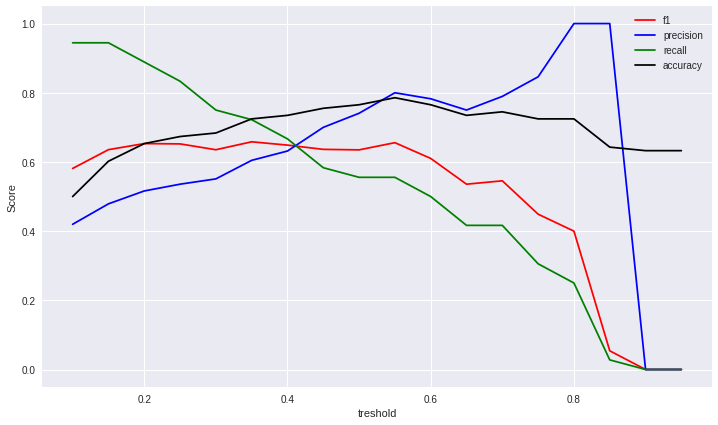

In [63]:
validate_treshold(rf, df_2years_known, data_2021["target"])

In [71]:
df_2years_known.reset_index(inplace=True)
df_2years_known.drop(columns=['Наименование ДП'], inplace=True)

In [116]:
make_report(rf, df_2years_known.reset_index(), data_2021["target"])

Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.6...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.6...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.6...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.6...
Validate predictions...
Fitting model RandomForestClassifier(n_estimators=1000, random_state=42) with treshold = 0.6...
Validate predictions...
ROC list:  [0.7577639751552795, 0.8504228329809724, 0.8202959830866807, 0.804968287526427, 0.8435517970401691]
F1 = 0.5923, Precision = 0.8107, Recall = 0.4763
